In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#loading data 
df=pd.read_csv('banksalary.csv')

In [3]:
# exploring data 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee     208 non-null    int64  
 1   Education    208 non-null    int64  
 2   Grade        208 non-null    int64  
 3   Years1       208 non-null    int64  
 4   Years2       208 non-null    int64  
 5   Age          208 non-null    int64  
 6   Gender       208 non-null    object 
 7   PC Job       208 non-null    object 
 8   Salary       208 non-null    object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(2), int64(6), object(3)
memory usage: 18.0+ KB


In [4]:
df.drop(["Unnamed: 10","Unnamed: 9","Employee"],axis=1, inplace=True ) # dropping the column as they not usefull 
df['Salary'] = df['Salary'].str.replace('$', '')  # Remove dollar sign
df['Salary'] = df['Salary'].str.replace(',', '')  # Remove comma
df['Salary'] = pd.to_numeric(df['Salary'])  # Convert to numeric
df

,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary
0,3,1,3,1,26,Male,No,32000
1,1,1,14,1,38,Female,No,39100
2,1,1,12,0,35,Female,No,33200
3,2,1,8,7,40,Female,No,30600
4,3,1,3,0,28,Male,No,29000
...,...,...,...,...,...,...,...,...
203,3,6,34,0,60,Male,No,95000
204,5,6,36,0,61,Male,No,97000
205,5,6,32,0,62,Male,No,88000
206,5,6,35,0,59,Male,No,94000


In [5]:
#univariate analysis of main data 
df.describe()

,Education,Grade,Years1,Years2,Age,Salary
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,3.158654,2.759615,9.673077,2.375000,40.394231,39921.923077
std,1.467464,1.566529,6.987832,3.135237,10.318988,11256.153922
min,1.000000,1.000000,2.000000,0.000000,22.000000,26700.000000
25%,2.000000,1.000000,5.000000,0.000000,32.000000,33000.000000
50%,3.000000,3.000000,8.000000,1.000000,38.500000,37000.000000
75%,5.000000,4.000000,13.000000,4.000000,47.250000,44000.000000
max,5.000000,6.000000,39.000000,18.000000,65.000000,97000.000000


observation: 
* years1, average exp is 9.6 years prior to current company, max exp in prior comapny is 39 years 
* years2, average exp is 2.3 in the same company, max exp in current company is 18 years  
* age, average age of person is 40 years, where as minimum as is 22 and maximum age is 65
* salary, the average salary 39921, minmum salary is 26000 , max salary is 97000

In [6]:
# correaltion main-data 
df.corr()

,Education,Grade,Years1,Years2,Age,Salary
Education,1.000000,0.590372,-0.062286,-0.136895,-0.197161,0.431910
Grade,0.590372,1.000000,0.448665,-0.053361,0.255730,0.785202
Years1,-0.062286,0.448665,1.000000,-0.117639,0.684152,0.615610
Years2,-0.136895,-0.053361,-0.117639,1.000000,0.132784,-0.062671
Age,-0.197161,0.255730,0.684152,0.132784,1.000000,0.383798
Salary,0.431910,0.785202,0.615610,-0.062671,0.383798,1.000000


observation: 
* grades have highest corr with salary in main df among all numerical feature  0.78

In [7]:
# analysis of categorical column 
df.describe(include = object)

,Gender,PC Job
count,208,208
unique,2,2
top,Female,No
freq,140,189


observation : 
* In gender, we have two unquie value female with highest frequency of 140  and male of 68  with the total count of 208
* In pc job, out of 208 observation 189 have desk job, 19 don't have.

# Visualization 

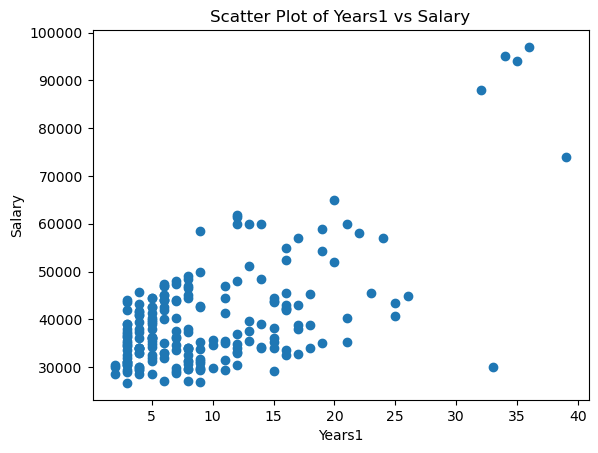

In [8]:
# Assuming your dataset is stored in a DataFrame called 'df'
x = df['Years1']  # x-axis variable
y = df['Salary']  # y-axis variable

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Years1')
plt.ylabel('Salary')
plt.title('Scatter Plot of Years1 vs Salary')

# Display the plot
plt.show()


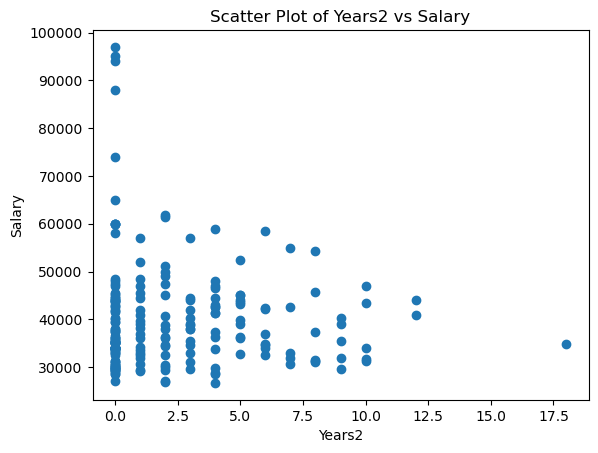

In [9]:
# Assuming your dataset is stored in a DataFrame called 'df'
x = df['Years2']  # x-axis variable
y = df['Salary']  # y-axis variable

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Years2')
plt.ylabel('Salary')
plt.title('Scatter Plot of Years2 vs Salary')

# Display the plot
plt.show()


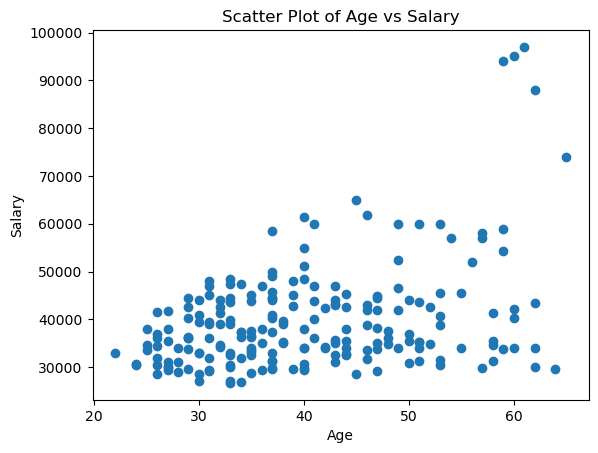

In [10]:
# Assuming your dataset is stored in a DataFrame called 'df'
x = df['Age']  # x-axis variable
y = df['Salary']  # y-axis variable

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs Salary')

# Display the plot
plt.show()


observation:  
* (years1, year2,age) vs salary 
* thier are few outliers in all three scatter plots
* in all 3 graph data is  mostly situated at lower qaud 


# Partioning male and female dataframe 

In [11]:
#divding main dataframe into male and female 
df_male=df[df["Gender"]=="Male"]
df_female=df[df["Gender"]=="Female"]

# Describe male and  female 

In [12]:
#analysis of male dataframe 
df_male.describe()

,Education,Grade,Years1,Years2,Age,Salary
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,3.926471,3.544118,9.867647,2.014706,39.382353,45505.441176
std,1.261558,1.799119,9.205619,3.054200,12.296134,15843.218280
min,1.000000,1.000000,2.000000,0.000000,22.000000,26700.000000
25%,3.000000,2.000000,4.000000,0.000000,29.000000,34375.000000
50%,5.000000,4.000000,6.000000,1.000000,34.500000,42500.000000
75%,5.000000,5.000000,12.250000,3.000000,51.250000,48625.000000
max,5.000000,6.000000,39.000000,18.000000,65.000000,97000.000000


In [13]:
#analysis of female dataframe 
df_female.describe()

,Education,Grade,Years1,Years2,Age,Salary
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2.785714,2.378571,9.578571,2.550000,40.885714,37209.928571
std,1.418205,1.283363,5.642934,3.169833,9.216880,6710.866577
min,1.000000,1.000000,2.000000,0.000000,24.000000,26800.000000
25%,2.000000,1.000000,5.000000,0.000000,34.000000,32575.000000
50%,3.000000,2.000000,8.000000,1.000000,40.000000,35450.000000
75%,3.250000,3.000000,13.000000,5.000000,47.000000,41550.000000
max,5.000000,6.000000,33.000000,12.000000,64.000000,61800.000000


observation :
* in male and female dataframe thier is not much difference between except salary, where avg age of 40 yr of male earn 7000 more than women

# Correlation male and female 

In [14]:
#male
df_male.corr()

,Education,Grade,Years1,Years2,Age,Salary
Education,1.000000,0.609725,0.163653,-0.270871,-0.004896,0.420672
Grade,0.609725,1.000000,0.667683,-0.254088,0.514006,0.820983
Years1,0.163653,0.667683,1.000000,-0.154408,0.780652,0.887698
Years2,-0.270871,-0.254088,-0.154408,1.000000,0.174717,-0.246586
Age,-0.004896,0.514006,0.780652,0.174717,1.000000,0.660464
Salary,0.420672,0.820983,0.887698,-0.246586,0.660464,1.000000


In [15]:
#female 
df_female.corr()

,Education,Grade,Years1,Years2,Age,Salary
Education,1.000000,0.503408,-0.246893,-0.052011,-0.294139,0.363090
Grade,0.503408,1.000000,0.258621,0.119991,0.105863,0.714718
Years1,-0.246893,0.258621,1.000000,-0.094739,0.596349,0.235411
Years2,-0.052011,0.119991,-0.094739,1.000000,0.101649,0.184269
Age,-0.294139,0.105863,0.596349,0.101649,1.000000,0.137023
Salary,0.363090,0.714718,0.235411,0.184269,0.137023,1.000000


observation :
* in male df  have high corr with grades, yeasr1,and age 
* in female df have high corr with grades (which common with male )


# Salary plot male and female 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

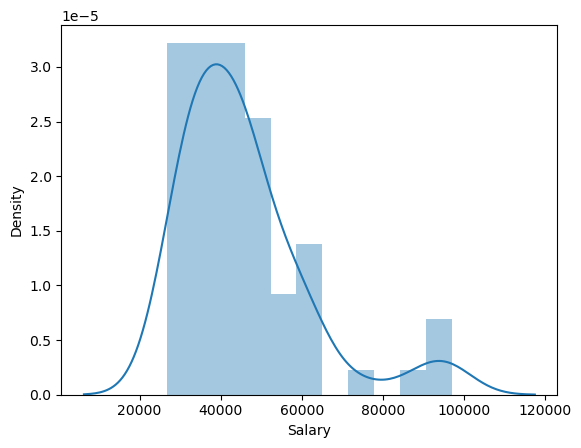

In [16]:
#male
sns.distplot(df_male['Salary'], hist=True)    

<AxesSubplot:xlabel='Salary', ylabel='Density'>

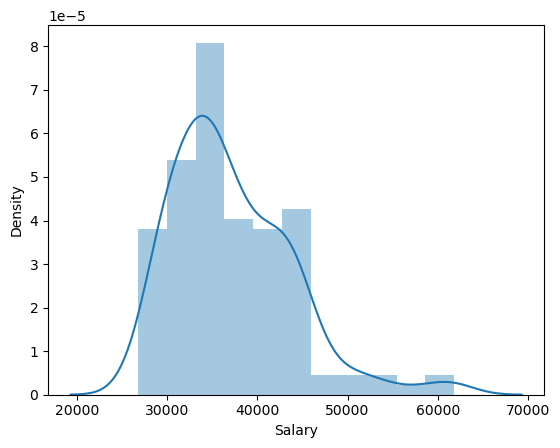

In [17]:
#female
sns.distplot(df_female['Salary'], hist=True)



# Age plot male and female  

<AxesSubplot:xlabel='Age', ylabel='Density'>

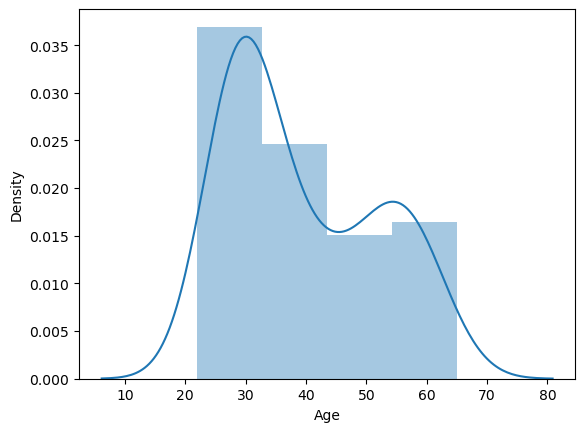

In [18]:
#male 
sns.distplot(df_male['Age'], hist=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

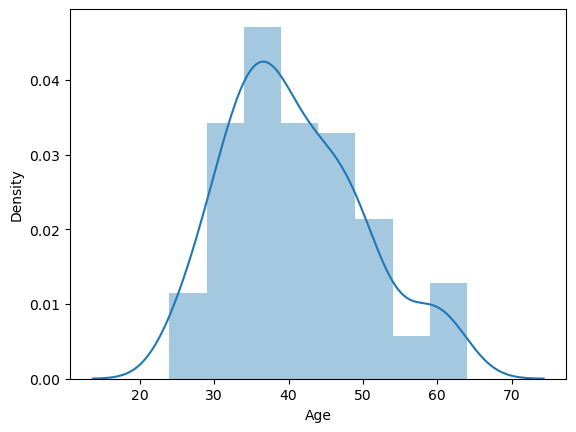

In [19]:
#female
sns.distplot(df_female['Age'], hist=True)

# Years1 plot male and female 

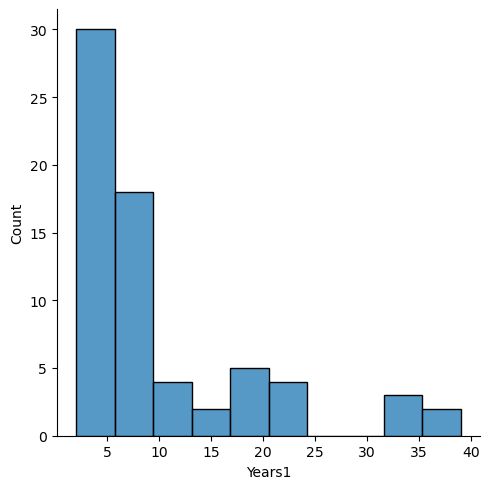

In [20]:
#male 
sns.displot(df_male["Years1"])

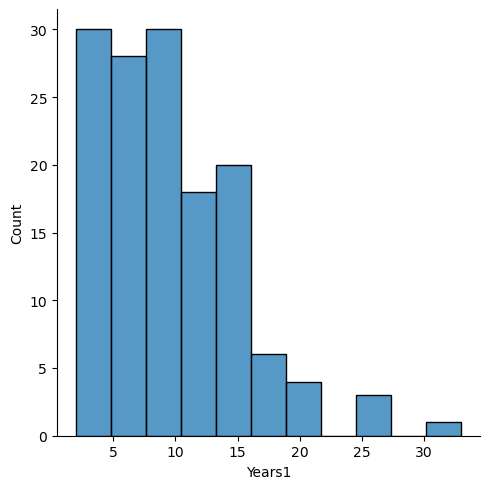

In [21]:
#female 
sns.displot(df_female["Years1"])

# Years2 plot male and female 

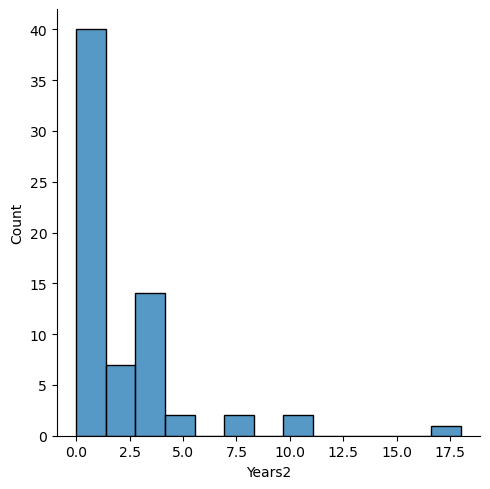

In [22]:
#male 
sns.displot(df_male["Years2"])

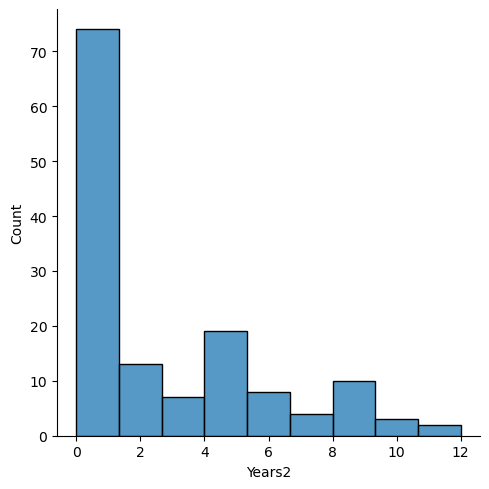

In [23]:
#female
sns.displot(df_female["Years2"])

# Bivariate Analysis 

# Education and Salary -  male vs female 

<BarContainer object of 5 artists>

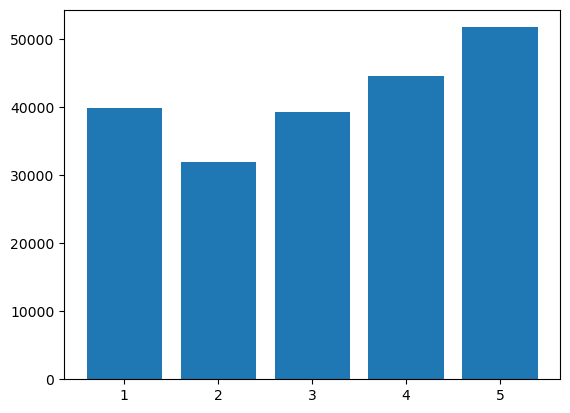

In [24]:
avg_salary = df_male.groupby('Education')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values) 

<BarContainer object of 5 artists>

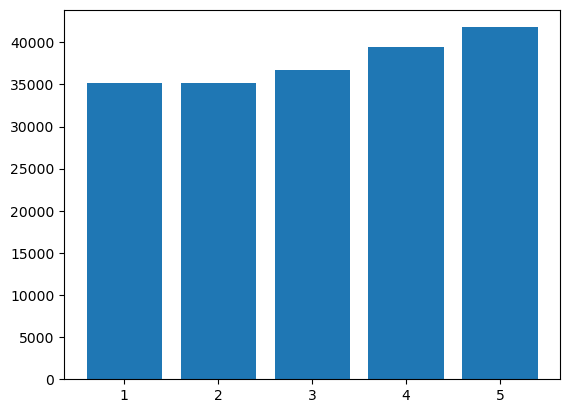

In [25]:
avg_salary = df_female.groupby('Education')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

observation:
* There is a slow gradual rise in salary as the Education level increases in male and female 


# Grade and Salary - male vs female 

<BarContainer object of 6 artists>

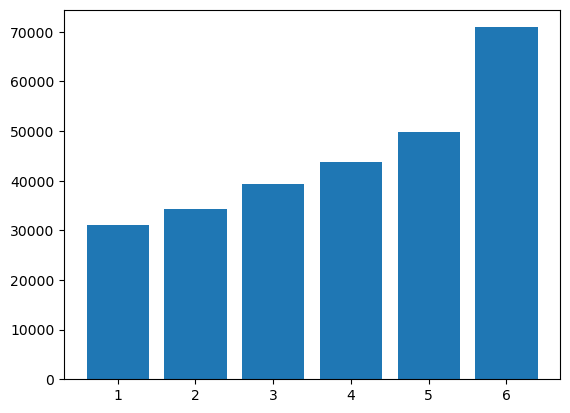

In [26]:
avg_salary = df_male .groupby('Grade')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

<BarContainer object of 6 artists>

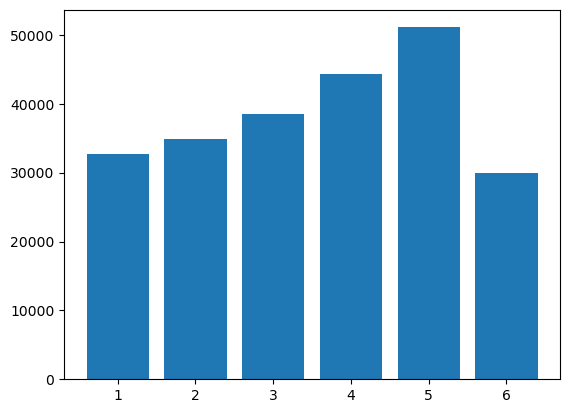

In [27]:
avg_salary = df_female .groupby('Grade')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

observation:
* grade 6 men are higly paid then women 

# Years1 and Salary (scatterplot) - male vs female 

<AxesSubplot:xlabel='Years1', ylabel='Salary'>

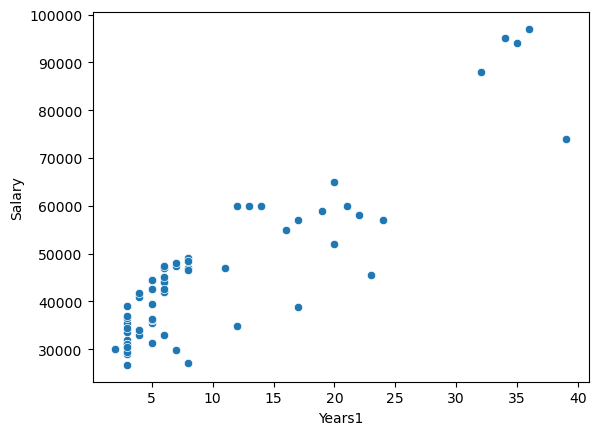

In [28]:
sns.scatterplot(x=df_male["Years1"], y=df_male["Salary"])

<AxesSubplot:xlabel='Years1', ylabel='Salary'>

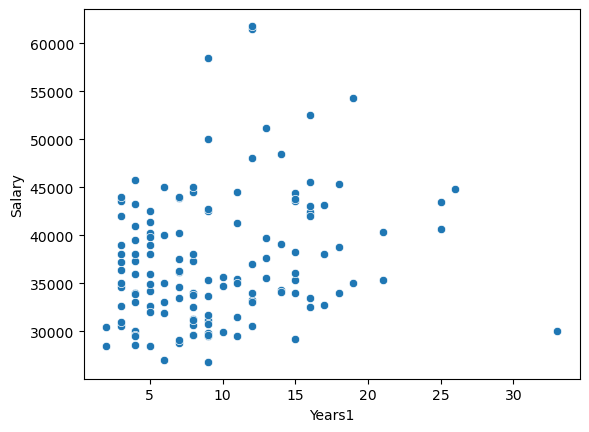

In [29]:
sns.scatterplot(x=df_female["Years1"], y=df_female["Salary"])

# Years2 and Salary (scatterplot) - male vs female 

<AxesSubplot:xlabel='Years2', ylabel='Salary'>

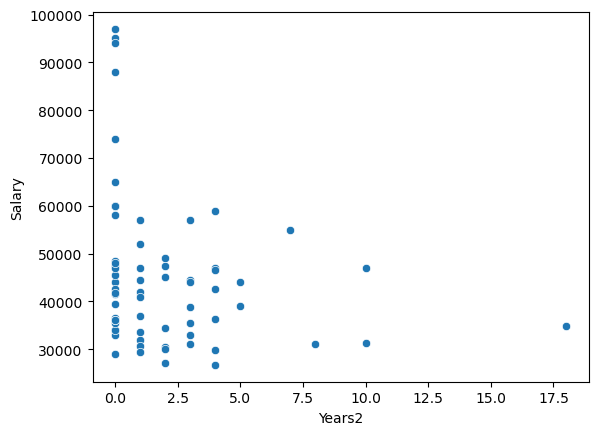

In [30]:
sns.scatterplot(x=df_male["Years2"], y=df_male["Salary"])

<AxesSubplot:xlabel='Years2', ylabel='Salary'>

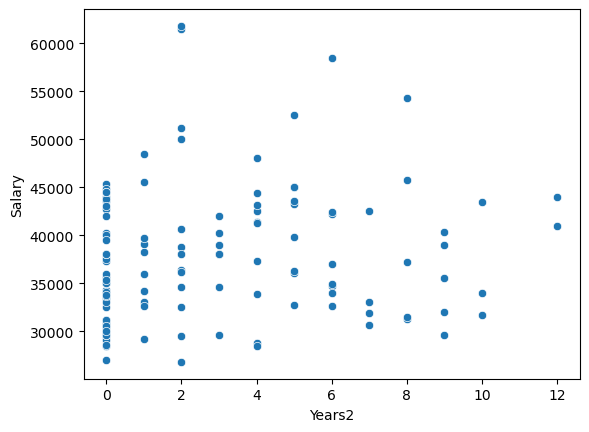

In [31]:
sns.scatterplot(x=df_female["Years2"], y=df_female["Salary"])

# Multi-variate anaysis 

In [32]:
# effect of grade and gender on salary 

In [33]:
df.pivot_table(index=['Grade'],columns=["Gender"], values=['Salary'], aggfunc=np.mean)

Salary              
Gender        Female          Male
Grade                             
1       32649.166667  31079.166667
2       34865.172414  34216.923077
3       38535.555556  39328.571429
4       44350.588235  43845.454545
5       51100.000000  49750.000000
6       30000.000000  70923.076923

In [34]:
#  effect age and grade with avg salary on grade basis 

In [35]:
df.pivot_table(index=['Grade'],columns=["Gender"], values=['Salary', "Age"], aggfunc=np.mean)

Age                   Salary              
Gender     Female       Male        Female          Male
Grade                                                   
1       40.458333  35.833333  32649.166667  31079.166667
2       40.034483  32.538462  34865.172414  34216.923077
3       40.361111  33.571429  38535.555556  39328.571429
4       43.294118  36.000000  44350.588235  43845.454545
5       41.111111  39.666667  51100.000000  49750.000000
6       62.000000  55.230769  30000.000000  70923.076923

observation :
* Men and women have similar level in average salaries across all education levels expect at level 6     where men have a very high average salary.

In [36]:
# effect gender,education on salary

In [37]:
df.pivot_table(index=['Education'],columns=["Gender"], values=['Salary'], aggfunc='mean')

Salary              
Gender           Female          Male
Education                            
1          35176.060606  39933.333333
2          35131.034483  31970.000000
3          36716.279070  39247.500000
4          39500.000000  44666.666667
5          41782.666667  51772.222222

In [38]:
df.pivot_table(index=['Education'], values=['Salary'], aggfunc='mean')

,Salary
Education,
1,35572.500000
2,34589.142857
3,37519.841270
4,41437.500000
5,47231.515152


observation :
* Male are having higher average salary than the overall average salary. whereas women average salary   is less than or equeal to the overall average salary

In [39]:
# effect gender,age,education on salary

In [40]:
df.pivot_table(index=['Education'],columns=["Gender"], values=['Salary', "Age"], aggfunc=np.mean)

Age                   Salary              
Gender        Female       Male        Female          Male
Education                                                  
1          45.000000  55.333333  35176.060606  39933.333333
2          44.586207  38.166667  35131.034483  31970.000000
3          37.000000  35.150000  36716.279070  39247.500000
4          41.600000  41.000000  39500.000000  44666.666667
5          38.233333  40.472222  41782.666667  51772.222222

# Statstical Apporach - t_statistics, f _statistics

In [41]:
# Separate the salaries for males and females
male_salaries = df[df['Gender'] == 'Male']['Salary']
female_salaries = df[df['Gender'] == 'Female']['Salary']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries)
 
# Define significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is evidence of discrimination against females in terms of salary.")
else:
    print("There is no evidence of discrimination against females in terms of salary.")


There is evidence of discrimination against females in terms of salary.


interpertation 
*this show that thier significant difference btwn avg salary of male and female 


In [42]:
#interaction effect of age,gender on salary 

In [43]:
a=pd.DataFrame(male_salaries)
a["Age"]=df.Age

b=pd.DataFrame(female_salaries)
b["Age"]=df.Age

import scipy.stats as stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(a,b) 

# Define significance level
alpha = 0.05

# Check if any of the p-values is less than the significance level
if any(p < alpha for p in p_value):
    print("There is evidence of a significant difference between groups.")
else:
    print("There is no significant difference between groups.")
    


There is evidence of a significant difference between groups.


In [44]:
#interaction effect of years1,gender on salary 

In [45]:
a=pd.DataFrame(male_salaries)
a["Years1"]=df.Years1

b=pd.DataFrame(female_salaries)
b["Years1"]=df.Years1

import scipy.stats as stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(a,b) 

# Define significance level
alpha = 0.05

# Check if any of the p-values is less than the significance level
if any(p < alpha for p in p_value):
    print("There is evidence of a significant difference between groups.")
else:
    print("There is no significant difference between groups.")

There is evidence of a significant difference between groups.


In [46]:
#interaction effect of years2,gender on salary 

In [47]:
a=pd.DataFrame(male_salaries)
a["Years2"]=df.Years2

b=pd.DataFrame(female_salaries)
b["Years2"]=df.Years2

import scipy.stats as stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(a,b) 

# Define significance level
alpha = 0.05

# Check if any of the p-values is less than the significance level
if any(p < alpha for p in p_value):
    print("There is evidence of a significant difference between groups.")
else:
    print("There is no significant difference between groups.")

There is evidence of a significant difference between groups.


over all observation :
* thier  is strong evidence of dicrimination on basis of gender 

# Algorithmic approach- Linear regression model

In [48]:
#columns info of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Education  208 non-null    int64 
 1   Grade      208 non-null    int64 
 2   Years1     208 non-null    int64 
 3   Years2     208 non-null    int64 
 4   Age        208 non-null    int64 
 5   Gender     208 non-null    object
 6   PC Job     208 non-null    object
 7   Salary     208 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 13.1+ KB


In [49]:
# Perform one-hot encoding
df_encoded=pd.get_dummies(df,columns=['Education', 'Grade','PC Job'])

# label encoding gender male as 0 , female as 1
df_encoded["Gender"].replace({"Male":0,"Female":1},inplace=True)
df_encoded

,Years1,Years2,Age,Gender,Salary,Education_1,Education_2,Education_3,Education_4,Education_5,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Grade_6,PC Job_No,PC Job_Yes
0,3,1,26,0,32000,0,0,1,0,0,1,0,0,0,0,0,1,0
1,14,1,38,1,39100,1,0,0,0,0,1,0,0,0,0,0,1,0
2,12,0,35,1,33200,1,0,0,0,0,1,0,0,0,0,0,1,0
3,8,7,40,1,30600,0,1,0,0,0,1,0,0,0,0,0,1,0
4,3,0,28,0,29000,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,34,0,60,0,95000,0,0,1,0,0,0,0,0,0,0,1,1,0
204,36,0,61,0,97000,0,0,0,0,1,0,0,0,0,0,1,1,0
205,32,0,62,0,88000,0,0,0,0,1,0,0,0,0,0,1,1,0
206,35,0,59,0,94000,0,0,0,0,1,0,0,0,0,0,1,1,0


In [50]:
df_encoded.columns

Index(['Years1', 'Years2', 'Age', 'Gender', 'Salary', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Grade_1',
       'Grade_2', 'Grade_3', 'Grade_4', 'Grade_5', 'Grade_6', 'PC Job_No',
       'PC Job_Yes'],
      dtype='object')

In [51]:
# Define the dependent and independent variables
x = df_encoded.drop(['Salary'], axis=1)
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     44.94
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.21e-53
Time:                        17:29:05   Log-Likelihood:                -2084.3
No. Observations:                 208   AIC:                             4199.
Df Residuals:                     193   BIC:                             4249.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.227e+04   1281.001     17.383      

In [52]:
#after removing insignificant features i.e (years2, age ,grade3) and executing the model 

In [53]:
# Define the dependent and independent variables
x = df_encoded.drop(['Salary','Years2',"Age",'Grade_3'], axis=1)
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summaryL
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     52.46
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.01e-54
Time:                        17:29:05   Log-Likelihood:                -2085.1
No. Observations:                 208   AIC:                             4196.
Df Residuals:                     195   BIC:                             4240.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.261e+04    906.915     24.928      

In [54]:
#selecting  on the basis of EDA 

In [55]:
# Define the dependent and independent variables
x = df_encoded.drop([ "PC Job_No", "PC Job_Yes", "Years2", "Salary"], axis=1)
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     48.21
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.07e-52
Time:                        17:29:05   Log-Likelihood:                -2091.7
No. Observations:                 208   AIC:                             4209.
Df Residuals:                     195   BIC:                             4253.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.828e+04   1687.072     16.764      

In [56]:
# trying observation impact gender and salary as feature and label 

In [57]:
# Define the dependent and independent variables
x = df_encoded['Gender']
y = df_encoded['Salary']

# Add constant to the indepen dent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.94e-07
Time:                        17:29:05   Log-Likelihood:                -2221.7
No. Observations:                 208   AIC:                             4447.
Df Residuals:                     206   BIC:                             4454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.551e+04   1283.530     35.453      0.0

In [58]:
# trying observation impact (gender+grade) on salary as feature and label 

In [59]:
# Define the dependent and independent variables
x = df_encoded[['Gender','Grade_1', 'Grade_2', 'Grade_3', 'Grade_4', 'Grade_5']]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     80.18
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.22e-50
Time:                        17:29:05   Log-Likelihood:                -2107.9
No. Observations:                 208   AIC:                             4230.
Df Residuals:                     201   BIC:                             4253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.802e+04   1658.840     41.006      0.0

In [60]:
# trying observation impact (gender+education) on salary as feature and label 

In [61]:
# Define the dependent and independent variables
x = df_encoded[['Gender','Education_1','Education_2', 'Education_3', 'Education_4', 'Education_5']]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     13.71
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.57e-11
Time:                        17:29:05   Log-Likelihood:                -2204.6
No. Observations:                 208   AIC:                             4421.
Df Residuals:                     202   BIC:                             4441.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.575e+04   1186.612     30.129      

In [62]:
# trying observation impact (gender+years1) on salary as feature and label 

In [63]:
# Define the dependent and independent variables
x = df_encoded[['Gender',"Years1"]]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     98.86
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.76e-31
Time:                        17:29:05   Log-Likelihood:                -2164.8
No. Observations:                 208   AIC:                             4336.
Df Residuals:                     205   BIC:                             4346.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.582e+04   1259.106     28.452      0.0

In [64]:
# trying observation impact (gender+years2) on salary as feature and label 

In [65]:
# Define the dependent and independent variables
x = df_encoded[['Gender',"Years2"]]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     14.15
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.75e-06
Time:                        17:29:05   Log-Likelihood:                -2221.6
No. Observations:                 208   AIC:                             4449.
Df Residuals:                     205   BIC:                             4459.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.576e+04   1370.728     33.383      0.0

# Interaction effect -gender and education

In [66]:
df_gen_edu=pd.DataFrame() # empty dataframe for gender and education 
#making dependent variable by multipying them , creating intreaction effect 
df_gen_edu["gen_ed1"]=df_encoded["Gender"]*df_encoded["Education_1"]
df_gen_edu["gen_ed2"]=df_encoded["Gender"]*df_encoded["Education_2"]
df_gen_edu["gen_ed3"]=df_encoded["Gender"]*df_encoded["Education_3"]
df_gen_edu["gen_ed4"]=df_encoded["Gender"]*df_encoded["Education_4"]
df_gen_edu["gen_ed5"]=df_encoded["Gender"]*df_encoded["Education_5"]


# Define the dependent and independent variables
x = df_gen_edu
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     7.433
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.02e-06
Time:                        17:29:05   Log-Likelihood:                -2217.4
No. Observations:                 208   AIC:                             4447.
Df Residuals:                     202   BIC:                             4467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.551e+04   1269.909     35.834      0.0

# Interaction effect -gender and grade 

In [67]:
df_gen_grade=pd.DataFrame() # empty dataframe for gender and grade
#making dependent variable by multipying them , creating intreaction effect 
df_gen_grade["gen_gr1"]=df_encoded["Gender"]*df_encoded["Grade_1"]
df_gen_grade["gen_gr2"]=df_encoded["Gender"]*df_encoded['Grade_2']
df_gen_grade["gen_gr3"]=df_encoded["Gender"]*df_encoded['Grade_3']
df_gen_grade["gen_gr4"]=df_encoded["Gender"]*df_encoded['Grade_4']
df_gen_grade["gen_gr5"]=df_encoded["Gender"]*df_encoded['Grade_5']


# Define the dependent and independent variables
x = df_gen_grade
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     14.11
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.74e-12
Time:                        17:29:05   Log-Likelihood:                -2203.8
No. Observations:                 208   AIC:                             4420.
Df Residuals:                     202   BIC:                             4440.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.528e+04   1180.936     38.343      0.0

In [68]:
df_encoded.columns

Index(['Years1', 'Years2', 'Age', 'Gender', 'Salary', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Grade_1',
       'Grade_2', 'Grade_3', 'Grade_4', 'Grade_5', 'Grade_6', 'PC Job_No',
       'PC Job_Yes'],
      dtype='object')

In [69]:
# trying observation interaction (gender+Age) on salary as feature and label 

In [70]:
# Define the dependent and independent variables
x = df_encoded['Gender']*df_encoded['Age']
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     20.09
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.23e-05
Time:                        17:29:06   Log-Likelihood:                -2225.3
No. Observations:                 208   AIC:                             4455.
Df Residuals:                     206   BIC:                             4461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.439e+04   1245.967     35.628      0.0

In [71]:
# Define the dependent and independent variables
x = df_encoded['Gender']*df_encoded['Years1']
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.371
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0215
Time:                        17:29:06   Log-Likelihood:                -2232.3
No. Observations:                 208   AIC:                             4469.
Df Residuals:                     206   BIC:                             4475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.171e+04   1092.922     38.167      0.0

In [72]:
# Define the dependent and independent variables
x = df_encoded['Gender']*df_encoded['Years2']
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8341
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.362
Time:                        17:29:06   Log-Likelihood:                -2234.6
No. Observations:                 208   AIC:                             4473.
Df Residuals:                     206   BIC:                             4480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.035e+04    911.099     44.288      0.0

In [73]:
# Define the dependent and independent variables
x = df_encoded["Gender"]*df_encoded["PC Job_Yes"]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02414
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.877
Time:                        17:29:06   Log-Likelihood:                -2235.0
No. Observations:                 208   AIC:                             4474.
Df Residuals:                     206   BIC:                             4481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.988e+04    820.702     48.597      0.0

In [74]:
# Define the dependent and independent variables
x = df_encoded["Gender"]*df_encoded["PC Job_No"]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     26.19
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.06e-07
Time:                        17:29:06   Log-Likelihood:                -2222.6
No. Observations:                 208   AIC:                             4449.
Df Residuals:                     206   BIC:                             4456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.437e+04   1139.437     38.940      0.0

# Feature engineering -RFE

In [75]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [76]:
X=df_encoded.drop(["Salary"], axis =1)
y=df_encoded.Salary

In [77]:
# spllitting train n test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.1, random_state=42) 

In [78]:
model=LinearRegression() # fiiting the model

In [79]:
rfe=RFE(estimator=model,n_features_to_select= None)

In [80]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [81]:
train_selected_feat=rfe.transform(X_train)
test_selected_feat=rfe.transform(X_test)
model.fit(train_selected_feat,y_train)

LinearRegression()

In [82]:
score=model.score(test_selected_feat,y_test)
score

0.7412910192179387

In [83]:
y_pre=model.predict(test_selected_feat) # predicting the model

In [84]:
mse=mean_squared_error(np.array(y_pre),y_test)
np.sqrt(mse)

4348.532799572724

In [85]:
train_selected_feat.shape

(187, 8)

In [86]:
selected_features = X.columns[rfe.get_support()]
selected_features 

Index(['Education_4', 'Grade_1', 'Grade_2', 'Grade_3', 'Grade_5', 'Grade_6',
       'PC Job_No', 'PC Job_Yes'],
      dtype='object')

In [87]:
# Define the dependent and independent variable
x = df_encoded[['Education_4','Grade_1', 'Grade_2', 'Grade_3', 'Grade_5', 'Grade_6','PC Job_No', 'PC Job_Yes']]
y = df_encoded['Salary']

# Add constant to the independent variable matrix
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     72.20
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.51e-51
Time:                        17:29:06   Log-Likelihood:                -2103.9
No. Observations:                 208   AIC:                             4224.
Df Residuals:                     200   BIC:                             4251.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.051e+04    862.128     35.388      

observation :
* in RFE the vartion exaplin is less compared to the model we used on basis of t test after removing in significant values 
* this might happen due multicollinearity in data 
